<a href="https://colab.research.google.com/github/JuanPabloJP/Big-Data-2/blob/main/Link%20Analysis/Project/FpTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Minería de Elementos Frecuentes

- Avalos Gonzalez Joel Sebastian 
- Barriga Rosales Alan
- Hernández Lozano Juan Pablo



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
sns.set(style="darkgrid")

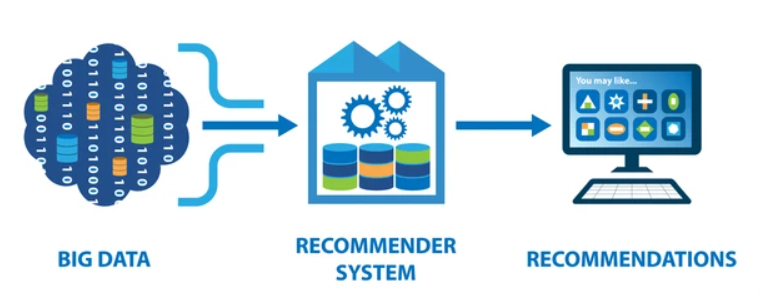

## Selección de columnas

In [ ]:
gross = pd.read_csv('groceries_c.csv')
print(gross.head())

   Item(s)            Item 1               Item 2  ... Item 30 Item 31 Item 32
0        4      citrus fruit  semi-finished bread  ...     NaN     NaN     NaN
1        3    tropical fruit               yogurt  ...     NaN     NaN     NaN
2        1        whole milk                  NaN  ...     NaN     NaN     NaN
3        4         pip fruit               yogurt  ...     NaN     NaN     NaN
4        4  other vegetables           whole milk  ...     NaN     NaN     NaN

[5 rows x 33 columns]


In [ ]:
print(gross.shape)

(9835, 33)


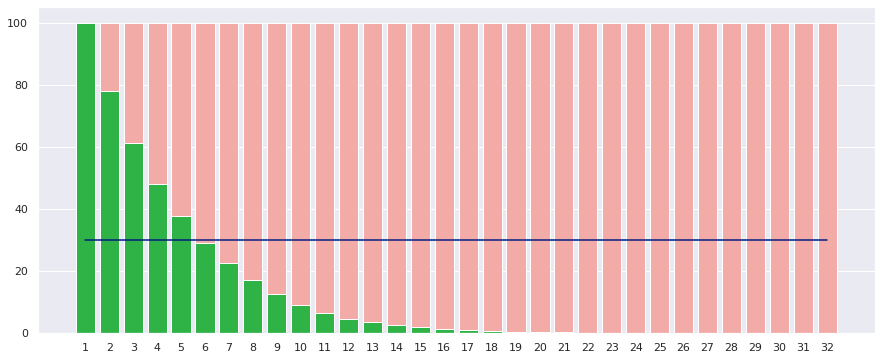

In [ ]:
a = 100+gross.isnull().sum().values[1:]*100/9835*(-1)
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
sns.barplot(x=list(range(1,len(a)+1)), y=[100]*len(a), color="r")

sns.set_color_codes("bright")
sns.barplot(x=list(range(1,len(a)+1)), y=a, color="g")

sns.set_color_codes("dark")
sns.lineplot(x=list(range(len(a))), y=[30]*len(a), color="b")

In [ ]:
gross = pd.read_csv('groceries_c.csv').iloc[:,1:6]
gross.head()

,Item 1,Item 2,Item 3,Item 4,Item 5
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN


## Elementos más frecuentes y soporte

In [ ]:
nTrans = gross.shape[0]
nTrans

9835

In [ ]:
items = list(gross["Item 1"].dropna().values)
for col in gross.columns[1:]:
    items = np.concatenate([items,list(gross[col].dropna().values)])

items = pd.Series(items).value_counts()

In [ ]:
font1 = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'medium',
        'size': 26,}
font2 = {'family': 'monospace',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 20,}

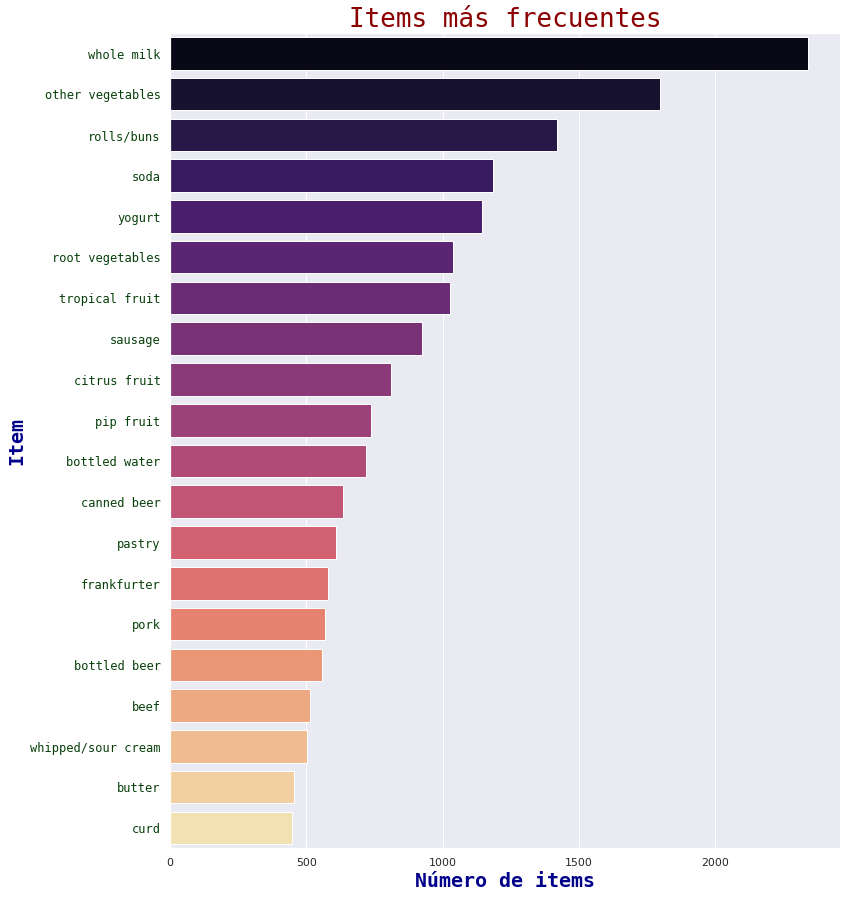

In [ ]:
plt.figure(figsize=(12,15))
plt.xlabel('Número de items', fontdict=font2)
plt.ylabel('Item', fontdict=font2)
plt.title('Items más frecuentes', fontdict=font1)
plt.yticks(fontname = 'monospace', color = '#08400b', size = 12)
sns.barplot(x=items.values[:20], y=items.index[:20], palette="magma")
plt.show()

In [ ]:
support = pd.DataFrame(items, columns=['Repeticiones'])
support['Soporte'] = support['Repeticiones']/nTrans
support.head()

,Repeticiones,Soporte
whole milk,2341,0.238027
other vegetables,1799,0.182918
rolls/buns,1421,0.144484
soda,1185,0.120488
yogurt,1143,0.116218


In [ ]:
freqItems = support.loc[support['Soporte'] > 0.09].index
freqItemsDF = support.loc[support['Soporte'] > 0.09]
len(freqItems)

8

In [ ]:
freqItems

Index(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt',
       'root vegetables', 'tropical fruit'],
      dtype='object')

## Quitar elementos no frecuentes

In [ ]:
def removeElements(x):
    if x in freqItems:
        return x
    else:
        return np.nan

In [ ]:
fpTree_df = gross.copy()
for col in fpTree_df.columns:
    fpTree_df[col] = fpTree_df[col].apply(removeElements)

## Pasar transaccones a una lista

In [ ]:
fpTrans = []
aux = fpTree_df.T
for col in aux.columns:
    fpTrans.append(list(aux[col].dropna().values))

In [ ]:
aux.head().iloc[:,:5]

,0,1,2,3,4
Item 1,citrus fruit,tropical fruit,whole milk,pip fruit,other vegetables
Item 2,NaN,yogurt,NaN,yogurt,whole milk
Item 3,NaN,NaN,NaN,NaN,NaN
Item 4,NaN,NaN,NaN,NaN,NaN
Item 5,NaN,NaN,NaN,NaN,NaN


## Ordenar por elementos más frecuentes

In [ ]:
itemsMap = dict(zip(freqItemsDF.index,freqItemsDF.Repeticiones))

In [ ]:
itemsMap

{'other vegetables': 1799,
 'rolls/buns': 1421,
 'root vegetables': 1039,
 'soda': 1185,
 'tropical fruit': 1027,
 'whole milk': 2341,
 'yogurt': 1143}

In [ ]:
def itemSorter(x):
    return sorted(x, key=lambda l: itemsMap[l], reverse=True) 

In [ ]:
sortedTrans = [itemSorter(x) for x in fpTrans if x]

In [ ]:
sortedTrans[:5]

[['yogurt', 'tropical fruit'],
 ['whole milk'],
 ['yogurt'],
 ['whole milk', 'other vegetables'],
 ['whole milk', 'yogurt']]

In [ ]:
Trans = []
for rule in sortedTrans:
    if rule:
        Trans.append(rule)

## A partir de acá ya está la lista con los productos ordenado por transacción para implementar el árbol.


In [ ]:
#!sudo apt-get install graphviz libgraphviz-dev graphviz-dev pkg-config

In [ ]:
#!pip install pygraphviz

In [ ]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

Referencias : [GitHub](https://github.com/RohiBaner/FPTree/blob/master/FPTree-Python3.py) [towardsdatascience.com](https://https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342) y [towardsdatascience.com](https://https://towardsdatascience.com/fp-growth-frequent-pattern-generation-in-data-mining-with-python-implementation-244e561ab1c3)

In [ ]:
class node:
  """Crea los nodos del árbol añadiéndo y verificando los hijos
  recibe los elementos de las transacción, sus frecuenicas y el nodo padre y su id
  En una primera instancia se llama a un nodo vacio para el comienzo del árbol"""
  
  def __init__(self, item, frequency, parent, id):
    self.item = item
    self.frequency = frequency
    self.parent = parent
    self.children  = []
    self.id = id
  #Incrementa la frecuencia
  def increment_frequency(self, increment = 1):
    self.frequency += increment
  #añande un nodo nuevo
  def add_children(self,node):
    self.children.append(node)
  #Verifica el nodo hijo
  def item_in_children(self, item):
    for child in self.children:
      if child.item == item:
        return child
    return False

class tree:
  def __init__(self,df):
    self.num_nodes = 0
    self.root = node('',None,None, self.num_nodes)
    self.df = df
    self.create_tree()

  def create_tree(self):
    for transaction in self.df.frequent_items:
      current_node = self.root
      for item in transaction:
        if not self.root.children:
          self.num_nodes += 1
          n = node(item,0,self.root,self.num_nodes)
          self.root.add_children(n)

        child = current_node.item_in_children(item)
        if child:
          child.increment_frequency()
        else:
          self.num_nodes += 1
          child = node(item, 1, current_node, self.num_nodes)
          current_node.add_children(child)
        current_node=child

In [ ]:
#fromNull = []
#for i in range(len(sortedTrans)):
#    fromNull.append(sortedTrans[i][0])

#G = nx.Graph()
#G.add_node('{}')
#for item in fromNull:
#    G.add_edge('{}',item)

#itCodes = "ABCDEFGHIJKLMN"
#mapper = dict(zip(freqItems,itCodes))

#T = nx.prefix_tree(fromNull)
#pos = graphviz_layout(G, prog="dot") #dot, twopi, circo
#nx.draw(G, pos, with_labels = True)
#plt.show()

#mappedTrans = []
#Trans = []
#for rule in fpTrans:
#    if rule:
#        Trans.append(rule)
#        newR = ''
#        for item in rule:
#            newR += mapper[item]
#        mappedTrans.append(newR) 

#mapped_rules = []
#for rule in mappedTrans:
#    if len(rule)>1:
#        mapped_rules.append(rule)

In [ ]:
def create_nx_graph(tree):
  """Creamos una gráfica con los datos obtenidos de nuestro objeto Tree
  Asigando la frecuencia de cada item al nodo correspondiente"""
  #Creamos la gráfica
  g = nx.Graph()
  #añadimos los nodos dadas las frecuencias
  g.add_nodes_from([(tree.root.id, {'item':tree.root.item,
                                    'frequency':tree.root.frequency})])
  #Empezamos a llenar las la forma de nuestra gráfica en el orden de los más frecuentes
  to_visit = tree.root.children.copy()
  while to_visit:
    n = to_visit.pop(0)
    g.add_nodes_from([(n.id,{'item':n.item,
                             'frequency':n.frequency})])
    g.add_edge(n.id,n.parent.id)
    to_visit.extend(n.children)
  return g

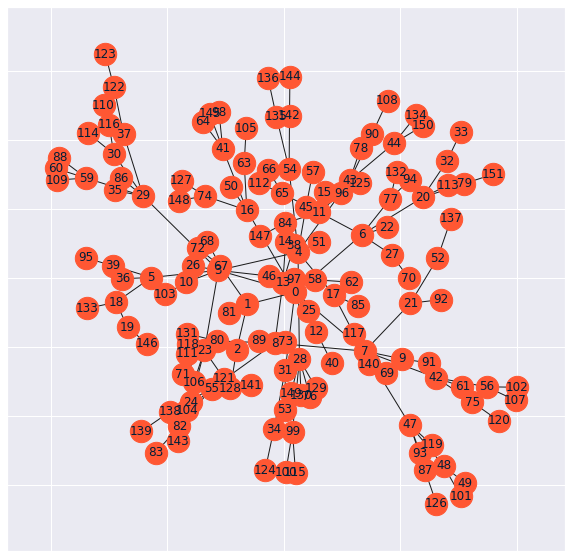

In [ ]:
data_tree = tree(Data)
g_data = create_nx_graph(data_tree)

fig = plt.figure(figsize=(10,10))

nx.draw_networkx(g_data, 
                  font_color='#001e38', node_color='#FF5733', 
                   node_size=500, font_size=12)

In [ ]:
def draw_tree(g, font_size=12, figsize=(10, 10)):
  labels = nx.get_node_attributes(g, 'item')
  labels = dict(g.nodes.data())
  graph_labels = dict()
  for l in labels:
    label_str = f"{labels[l]['item']}:{labels[l]['frequency']}"
    graph_labels[l] = label_str
  fig = plt.figure(figsize=figsize)
  pos = graphviz_layout(g_data, prog="twopi") 
  nx.draw_networkx(g, pos, labels=graph_labels, 
                  font_color='#001e38', node_color='#FF5733', 
                   node_size=1000, font_size=font_size)
  return fig

In [ ]:
Data = pd.DataFrame({
    'frequent_items': sortedTrans
})

Para un soporte > 0.14

In [ ]:
freqItems = support.loc[support['Soporte'] > 0.05].index
freqItemsDF = support.loc[support['Soporte'] > 0.05]
len(freqItems)

18

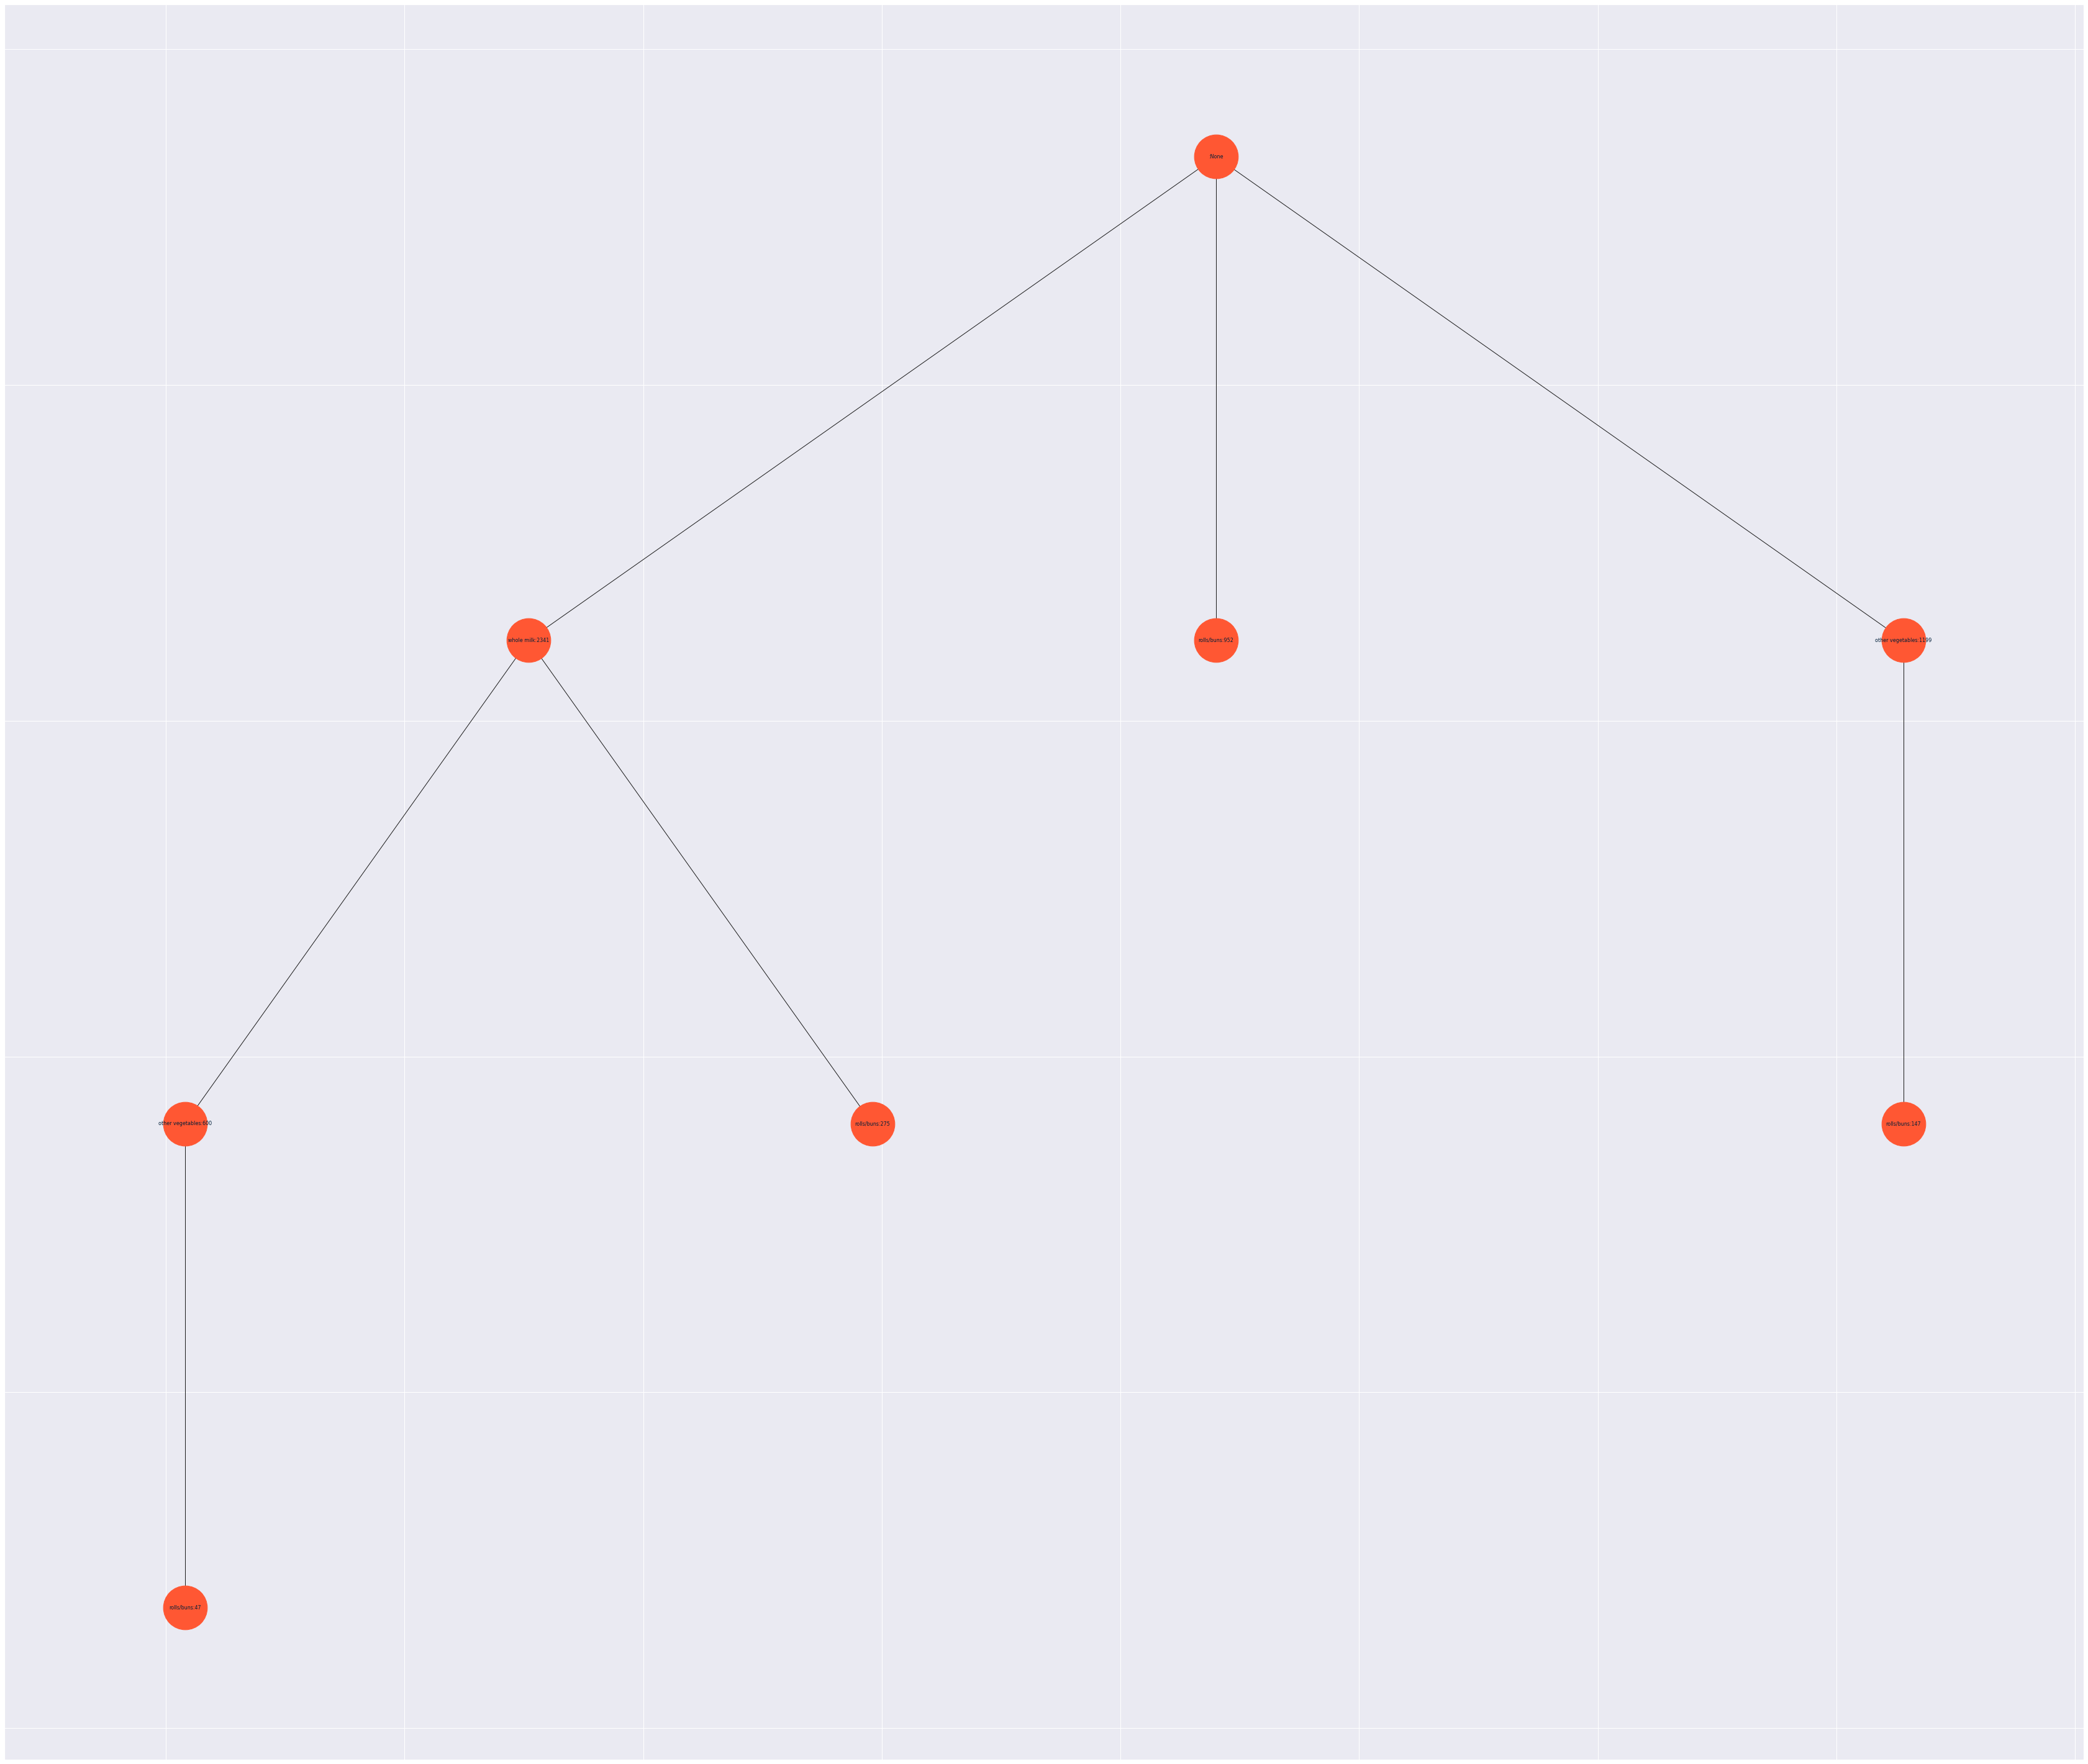

In [ ]:
figsize = (60, 52)
data_tree = tree(Data)
g_data = create_nx_graph(data_tree)
fig = draw_tree(g_data, node_size=5000, font_size=8, figsize=figsize)

Para un soporte de > 0.10

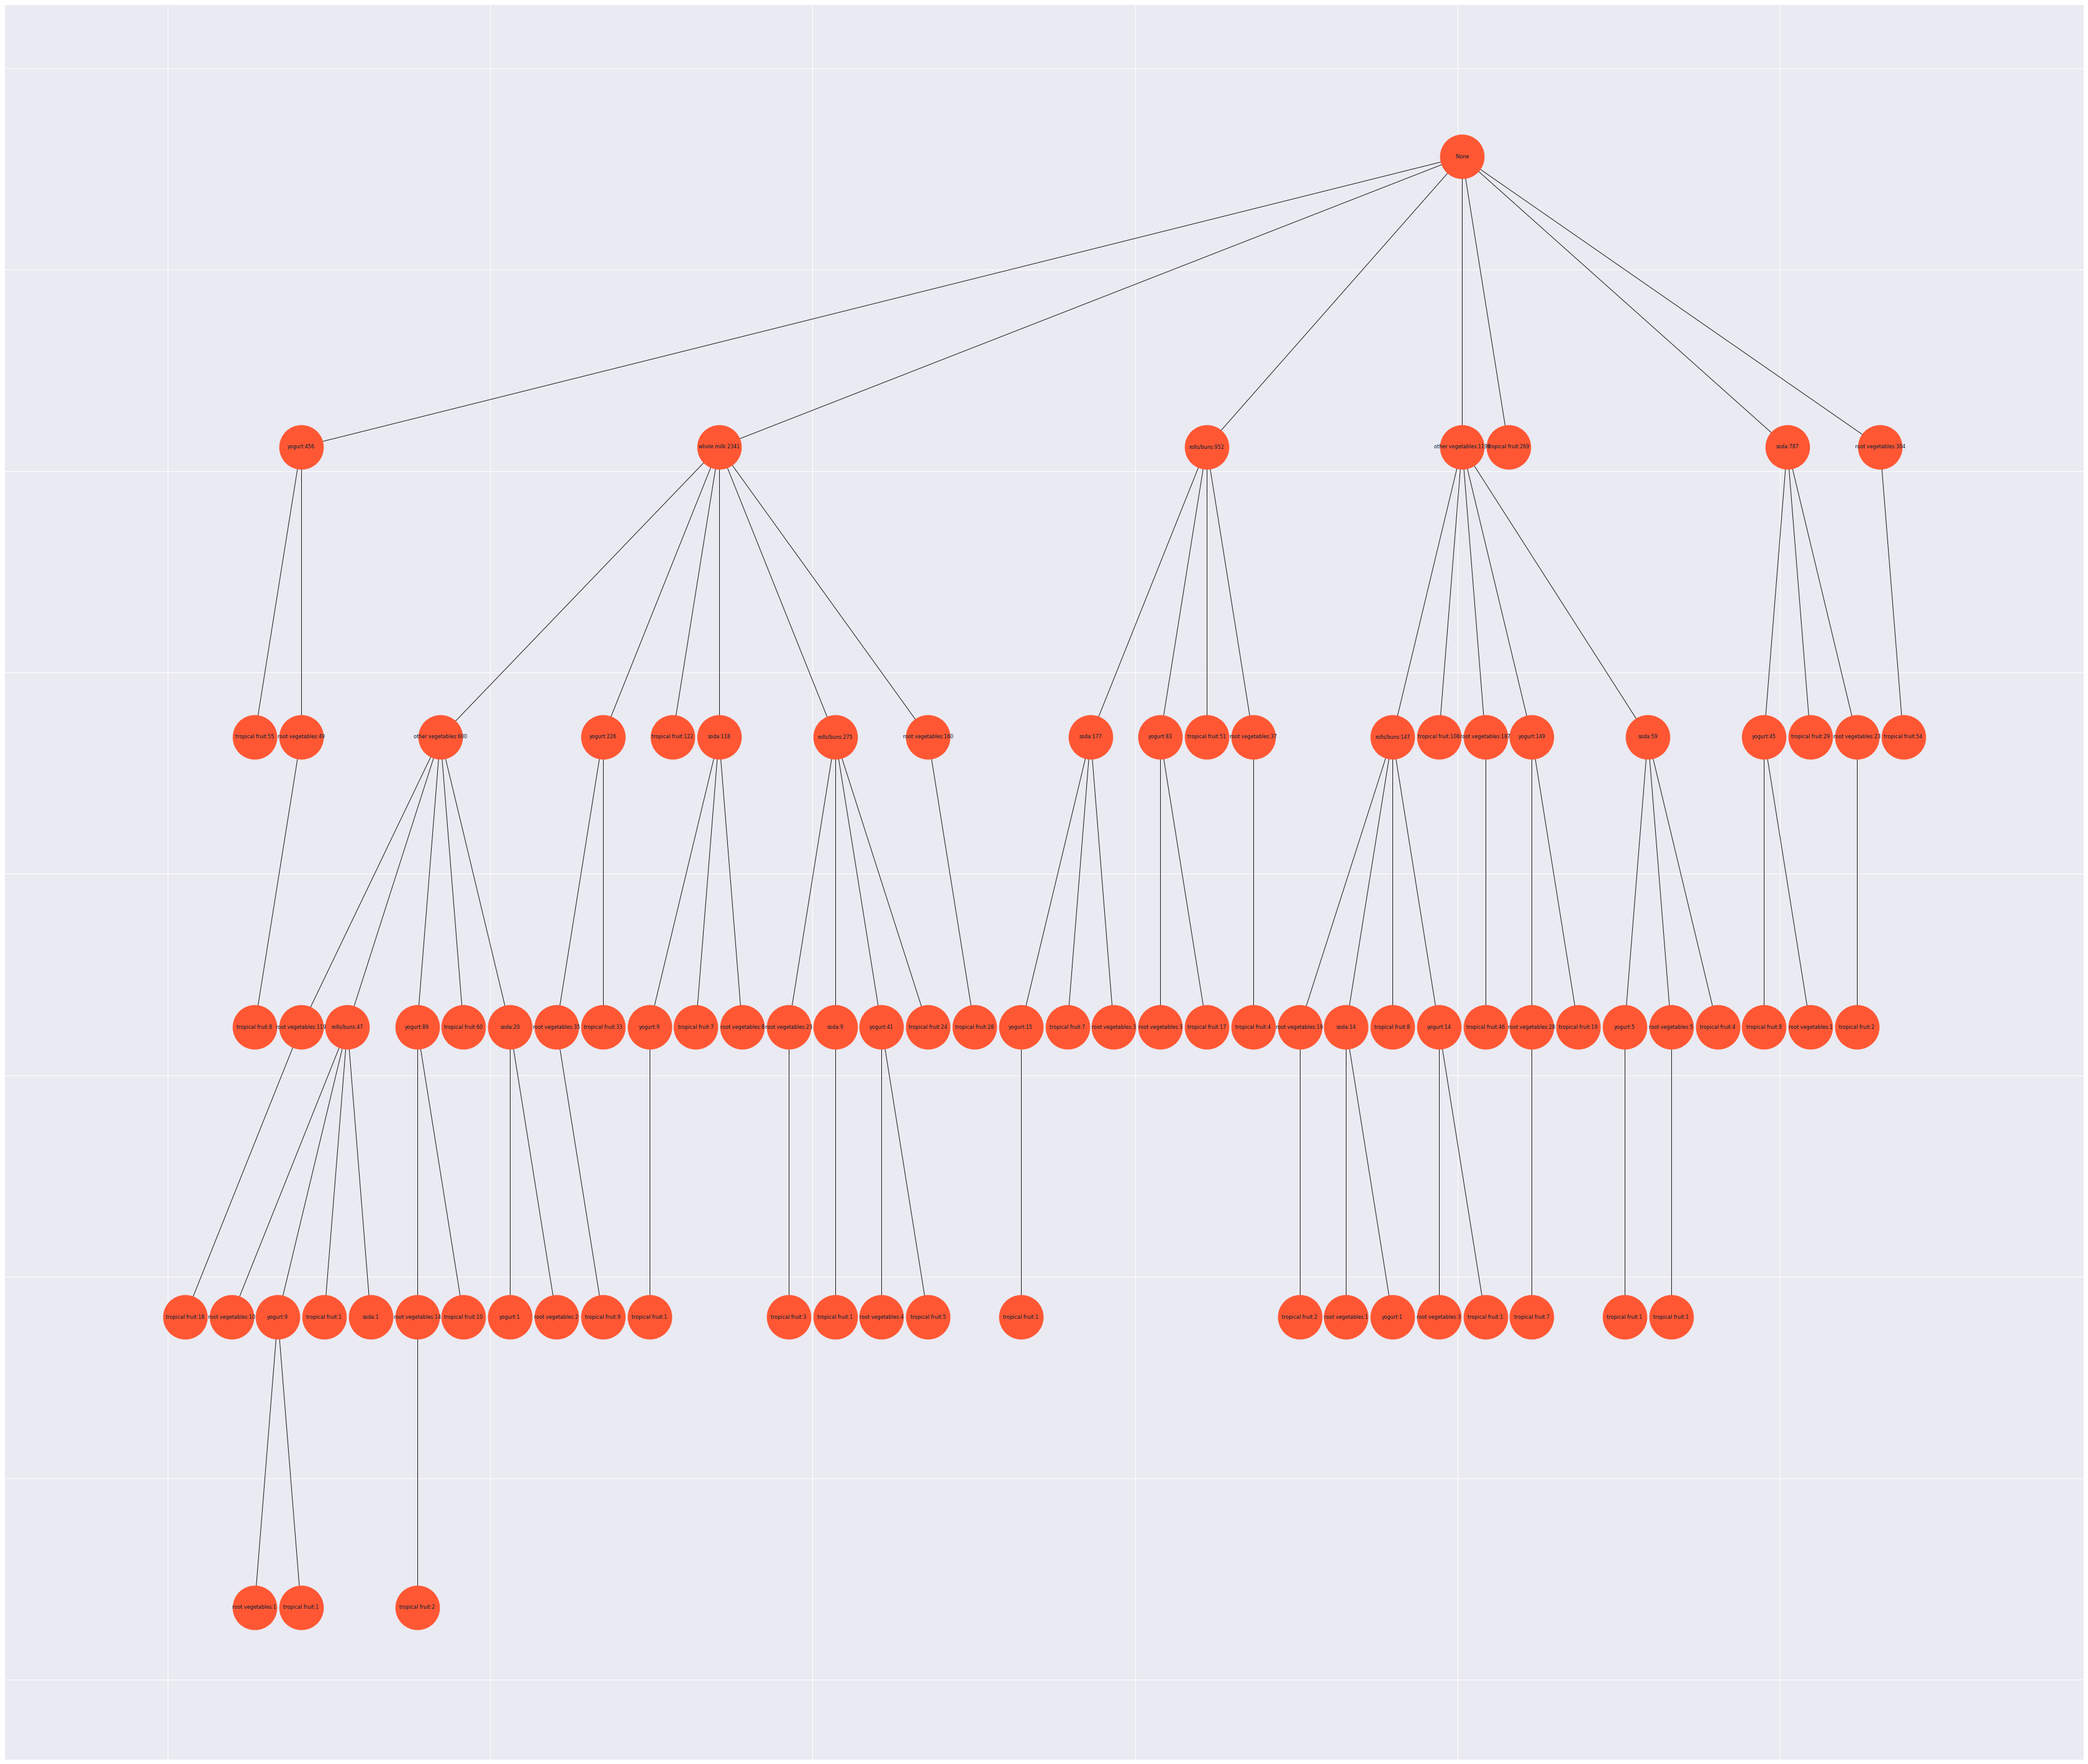

In [ ]:
figsize = (60, 52)
data_tree = tree(Data)
g_data = create_nx_graph(data_tree)
fig = draw_tree(g_data, node_size=5000, font_size=8, figsize=figsize)

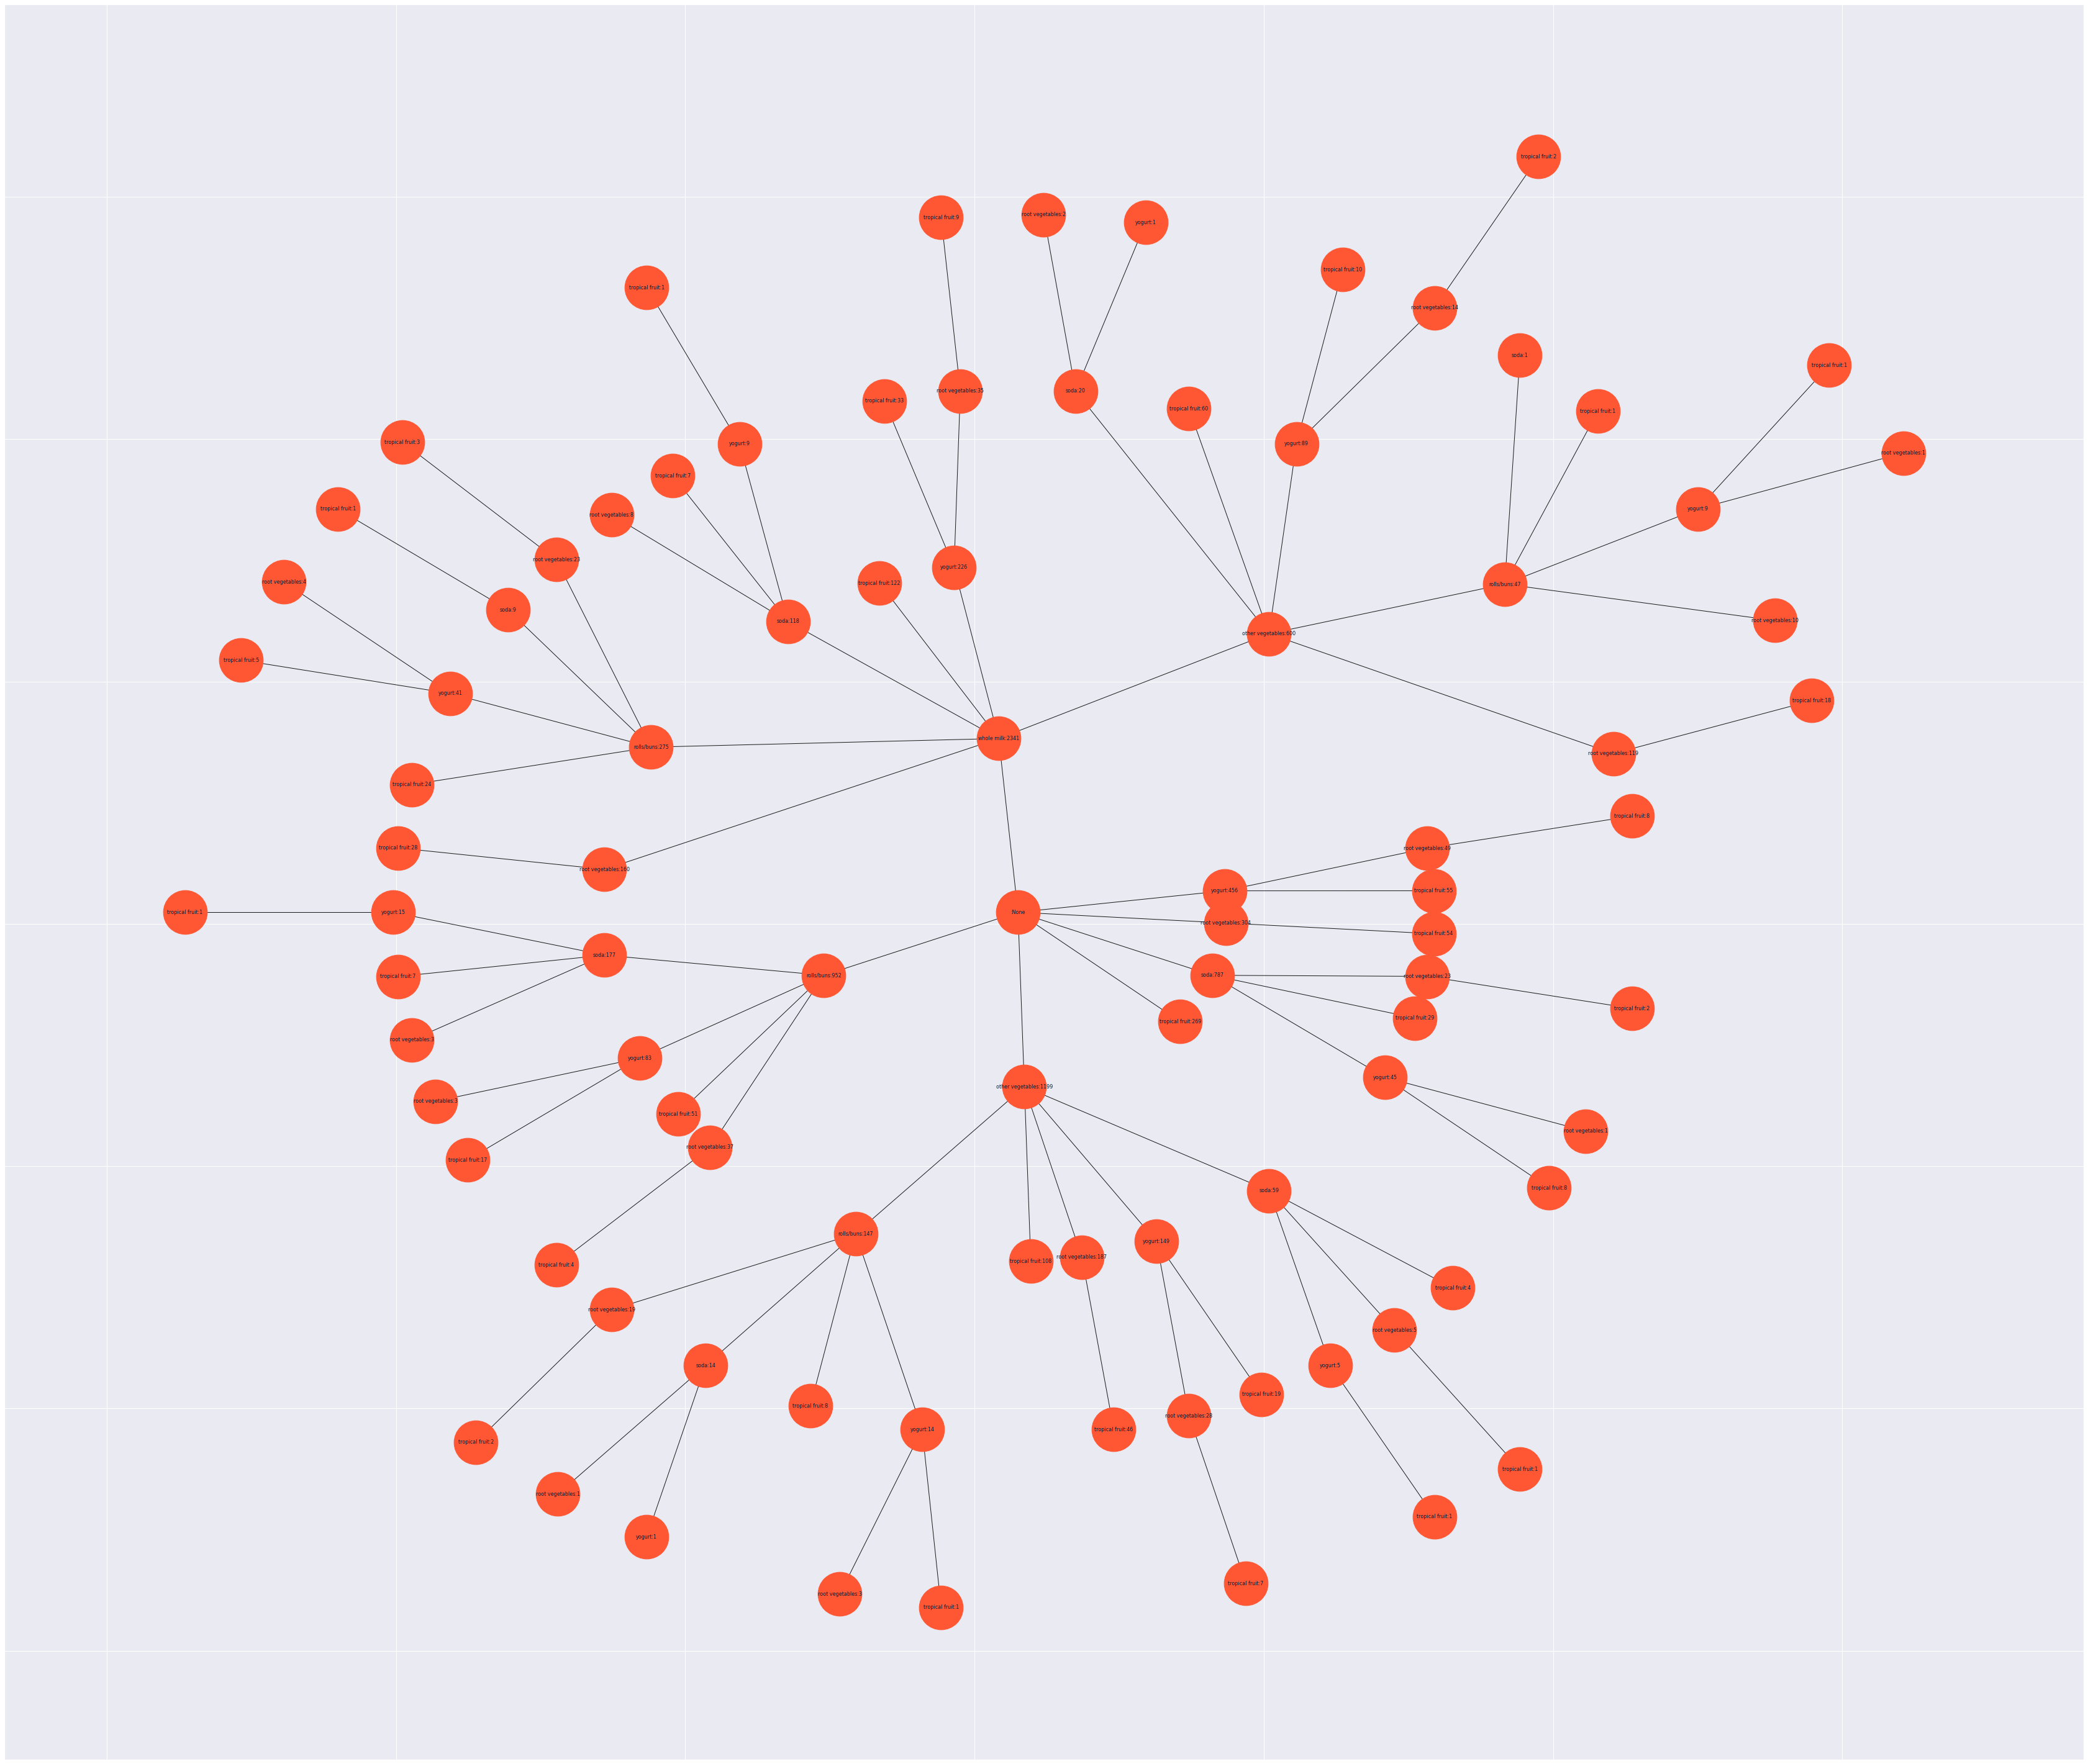

In [ ]:
figsize = (60, 52)
data_tree = tree(Data)
g_data = create_nx_graph(data_tree)
fig = draw_tree(g_data, node_size=5000, font_size=8, figsize=figsize)

Para un soporte > 0.09

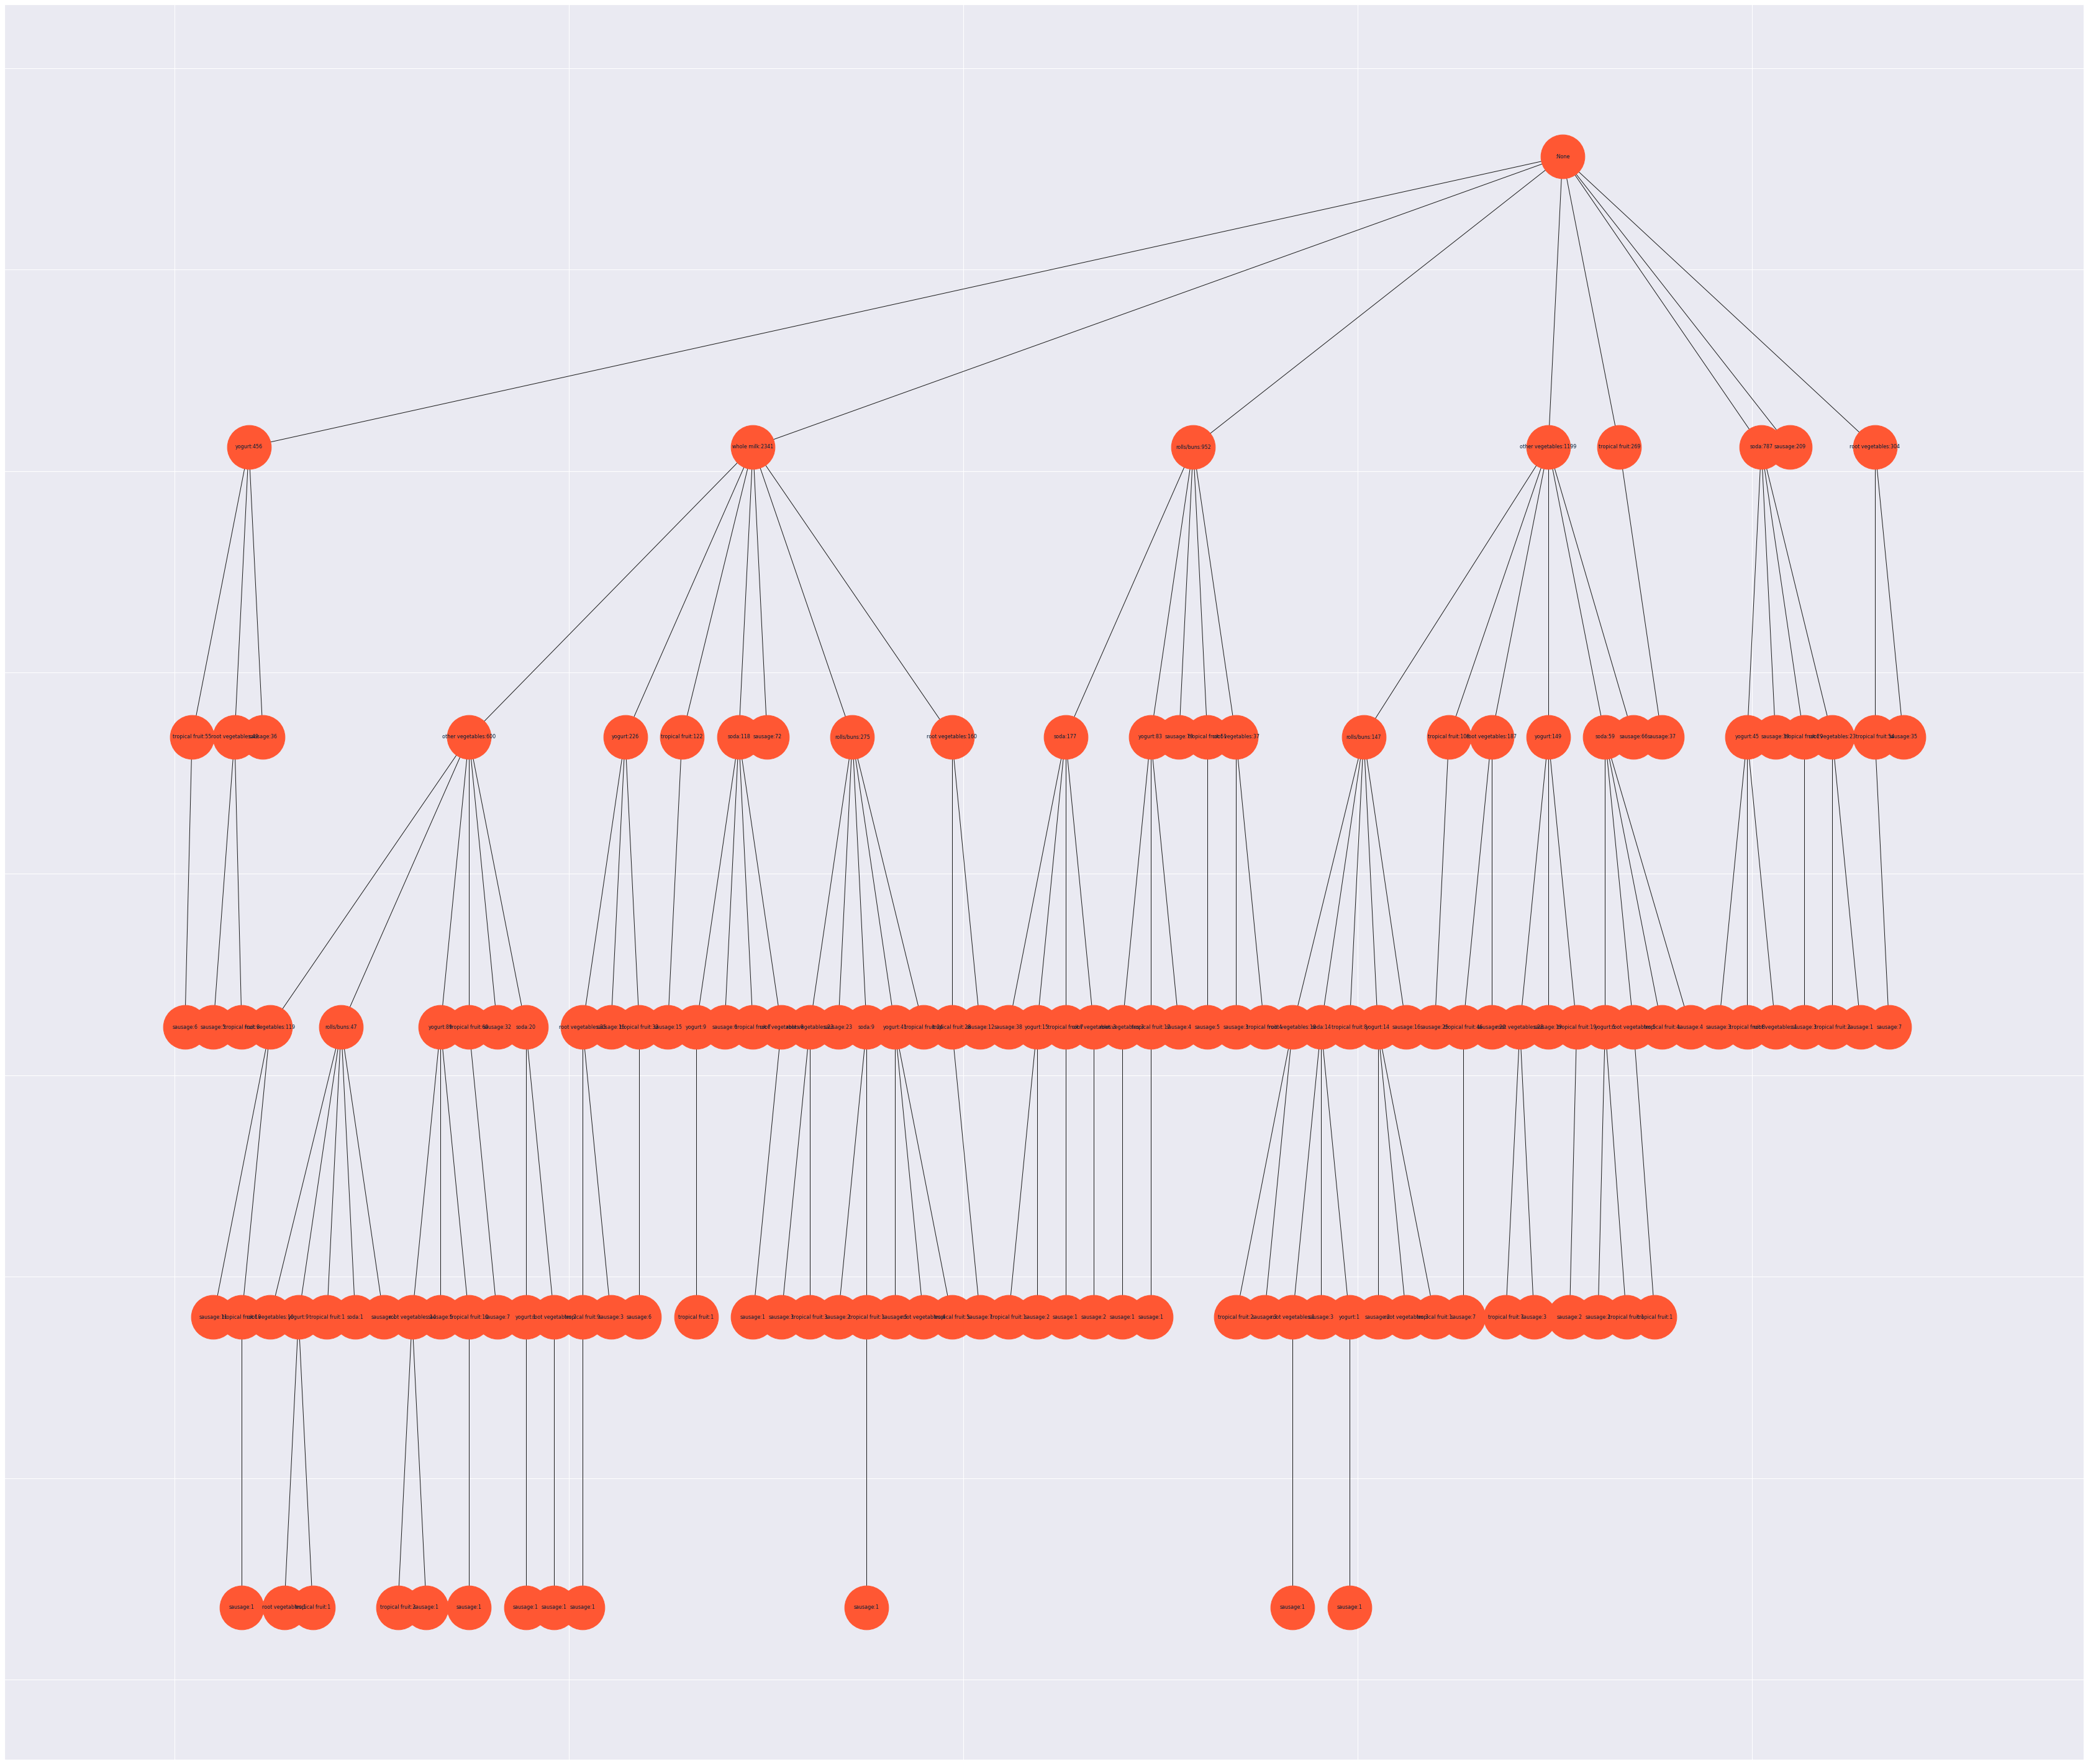

In [ ]:
figsize = (60, 52)
data_tree = tree(Data)
g_data = create_nx_graph(data_tree)
fig = draw_tree(g_data, node_size=5000, font_size=8, figsize=figsize)

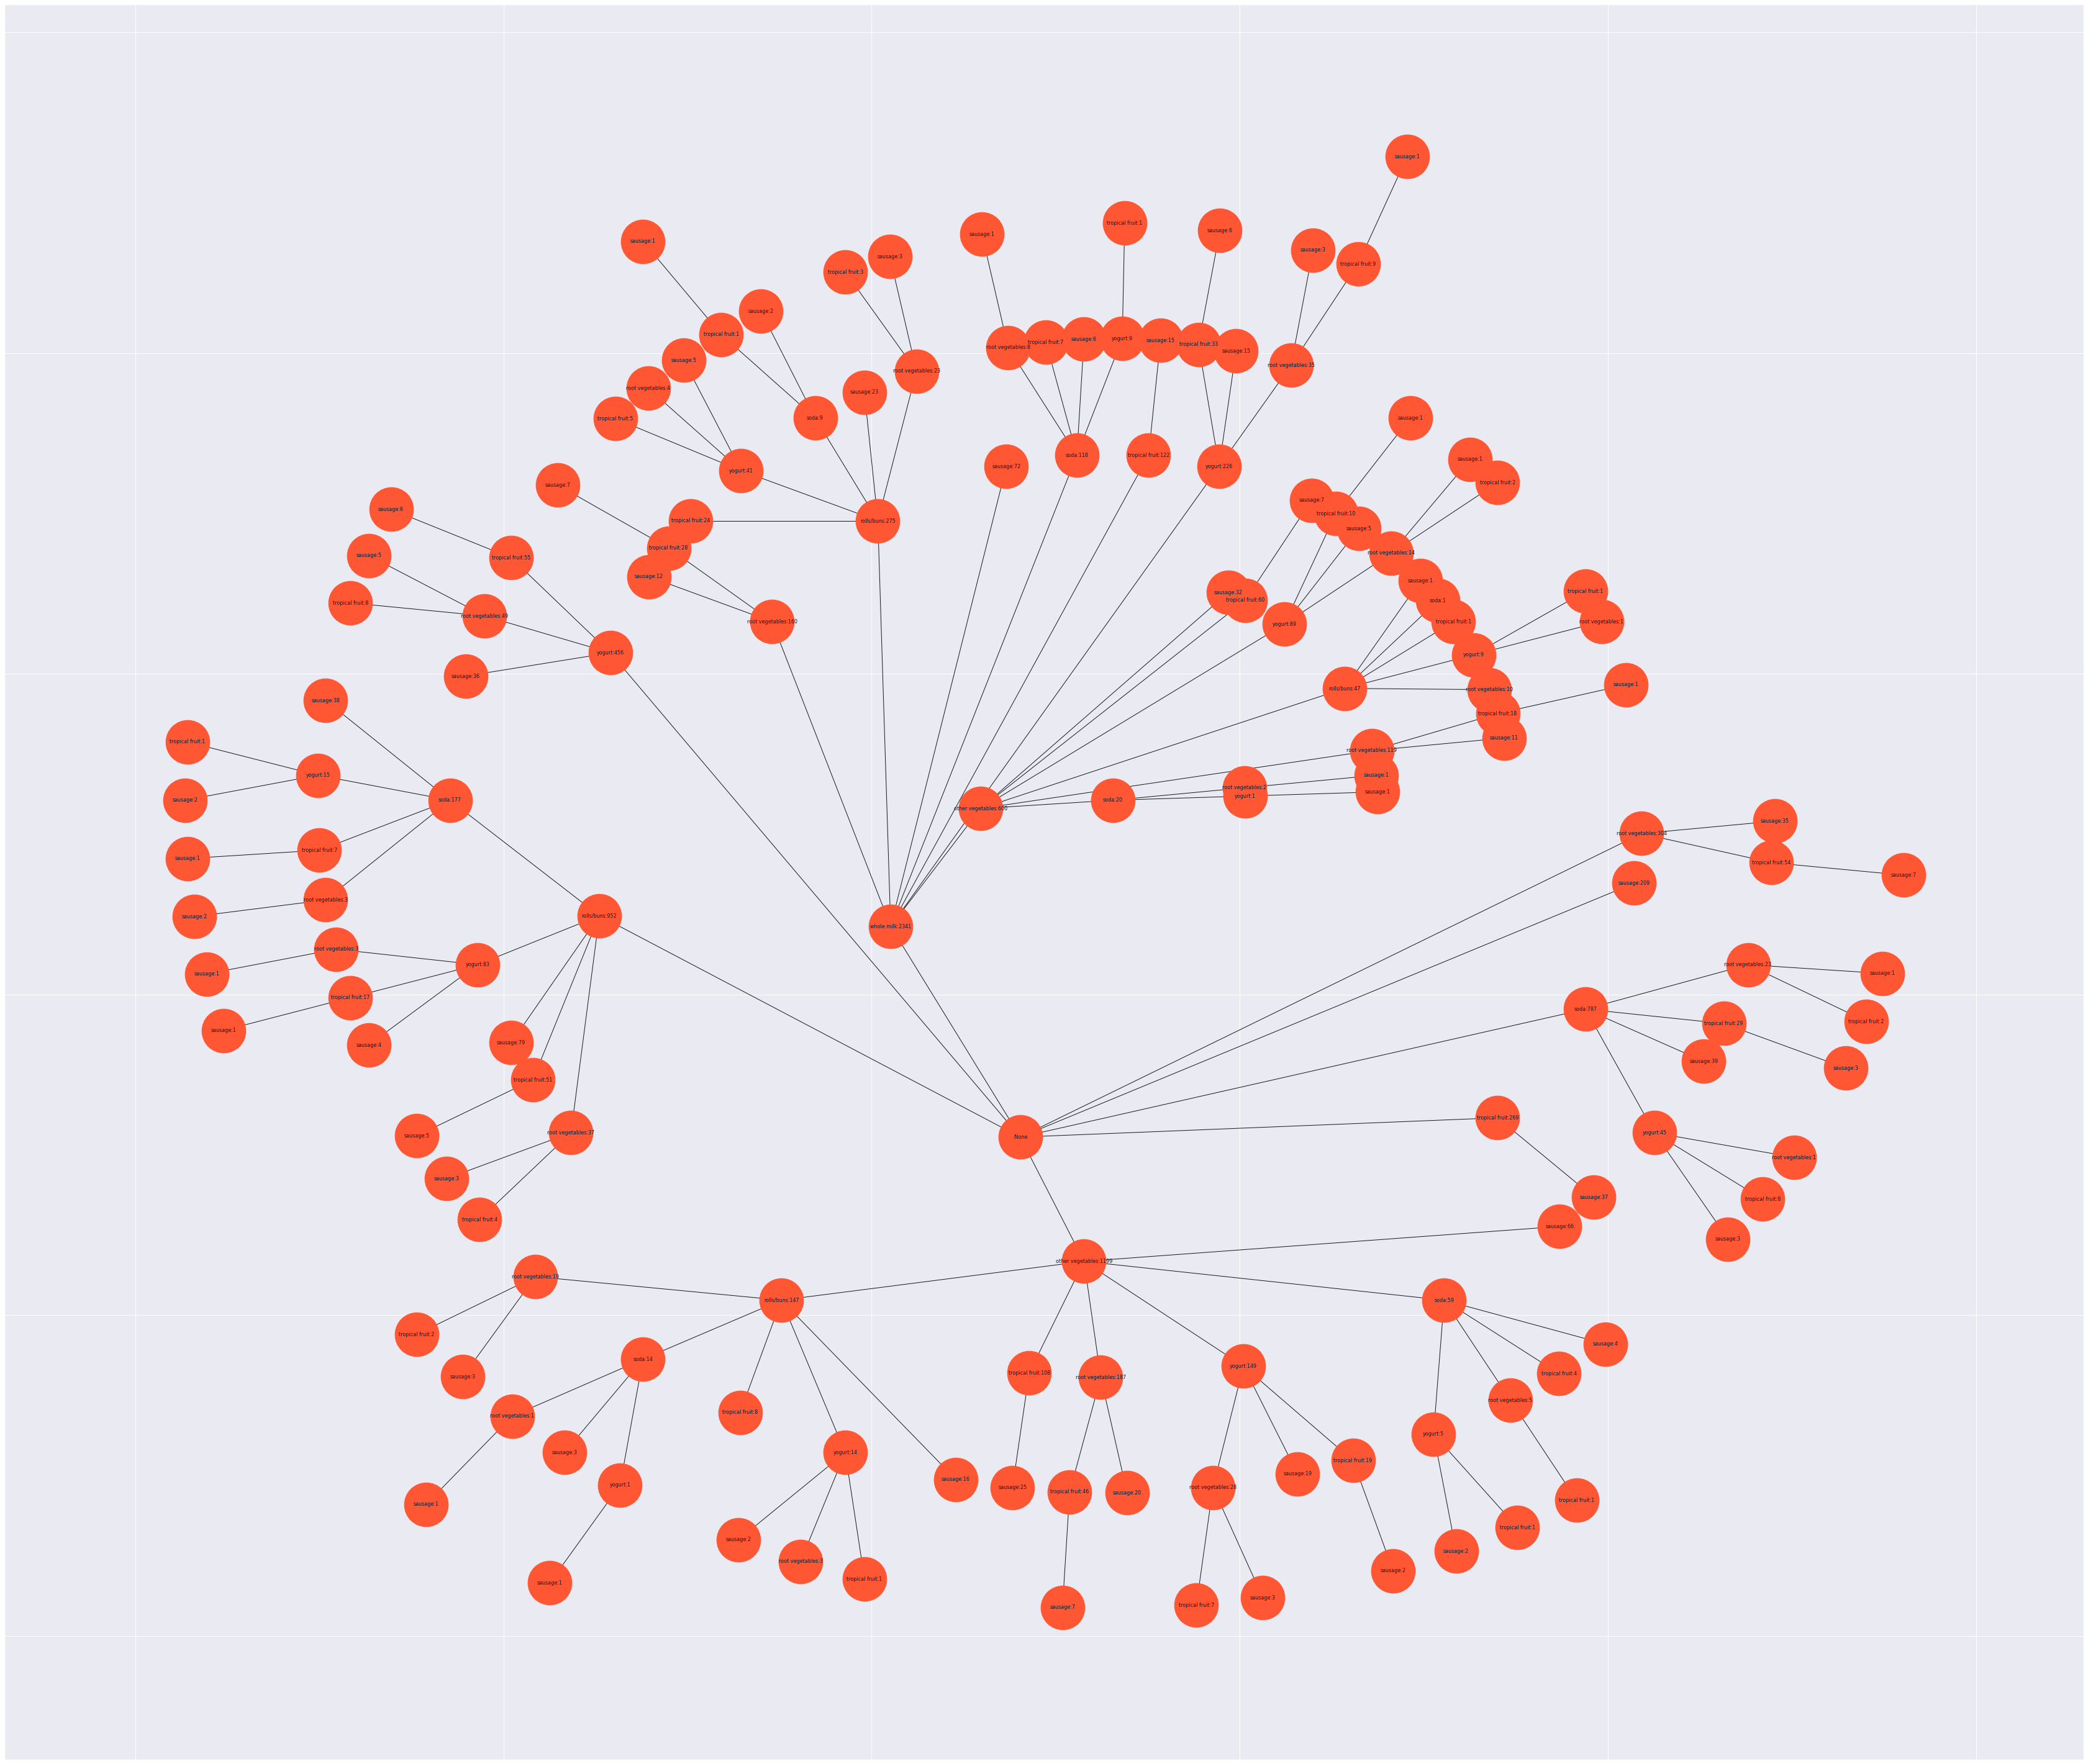

In [ ]:
figsize = (60, 52)
data_tree = tree(Data)
g_data = create_nx_graph(data_tree)
fig = draw_tree(g_data, node_size=5000, font_size=8, figsize=figsize)

In [ ]:
freqItems

Index(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt',
       'root vegetables', 'tropical fruit', 'sausage'],
      dtype='object')

In [ ]:
rules = apriori(Trans,min_support=0.00002,min_confidance=0.02,min_lift=3,min_length=2,target="rules")
association_results = list(rules)

In [ ]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: other vegetables -> yogurt
Support: 0.0006137793463249962
Confidence: 0.004329004329004329
Lift: 4.03030303030303
Rule: rolls/buns -> sausage
Support: 0.0004603345097437471
Confidence: 0.0032467532467532465
Lift: 5.289772727272727
Rule: rolls/buns -> root vegetables
Support: 0.00015344483658124905
Confidence: 0.0010822510822510823
Lift: 7.053030303030303
Rule: rolls/buns -> soda
Support: 0.00015344483658124905
Confidence: 0.0010822510822510823
Lift: 7.053030303030303
Rule: whole milk -> root vegetables
Support: 0.00015344483658124905
Confidence: 0.0009624639076034648
Lift: 3.13618864292589
Rule: whole milk -> soda
Support: 0.00015344483658124905
Confidence: 0.0005558643690939411
Lift: 3.6225680933852136
Rule: rolls/buns -> whole milk
Support: 0.00015344483658124905
Confidence: 0.0007037297677691767
Lift: 4.586206896551724


In [ ]:
association_results

[RelationRecord(items=frozenset({'other vegetables', 'yogurt', 'sausage', 'soda'}), support=0.0006137793463249962, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sausage'}), items_add=frozenset({'other vegetables', 'yogurt', 'soda'}), confidence=0.004329004329004329, lift=4.03030303030303), OrderedStatistic(items_base=frozenset({'other vegetables', 'yogurt', 'soda'}), items_add=frozenset({'sausage'}), confidence=0.5714285714285715, lift=4.030303030303031)]),
 RelationRecord(items=frozenset({'rolls/buns', 'sausage', 'root vegetables', 'soda'}), support=0.0004603345097437471, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sausage'}), items_add=frozenset({'rolls/buns', 'root vegetables', 'soda'}), confidence=0.0032467532467532465, lift=5.289772727272727), OrderedStatistic(items_base=frozenset({'rolls/buns', 'root vegetables', 'soda'}), items_add=frozenset({'sausage'}), confidence=0.75, lift=5.2897727272727275)]),
 RelationRecord(items=frozenset({'rolls/buns', 'ro